# Monte Carlo Simulation for FE
## IEOR 4703

### Implementation of a delta-hedging strategy for a call option (term structure volatility)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# import our BMS price and delta functions
from BMS import BMS_price, BMS_delta

In [2]:
spot = 100
K = 110
r = 0.10
q = 0.0
sig = 0.40

sig_0 = sig

maturity = 2

m = 52
dt = maturity/m

n_sim = 2000

### Compute the true value of the call

In [3]:
C = BMS_price('call', spot, K, r, q, sig, maturity)
P = BMS_price('put', spot, K, r, q, sig, maturity)
print('Under Black-Merton-Scholes, exact value of call = ' + str(C) + ' & put = '  + str(P))

Under Black-Merton-Scholes, exact value of call = 26.48473458740481 & put = 16.545117425982806


### Cost of constant delta-hedging strategy

In [4]:
np.random.seed(31667134)
z = np.random.randn(n_sim, m)

In [5]:
synthetic_C = np.zeros(n_sim)
synthetic_P = np.zeros(n_sim)

st = time()

for j in range(n_sim):

    # reset for each path
    S = spot
    T = maturity

    delta_C_prev = 0.0
    delta_P_prev = 0.0

    for i in range(m):

        delta_C = BMS_delta('call', S, K, r, q, sig, T)
        delta_P = BMS_delta('put',  S, K, r, q, sig, T)

        synthetic_C[j] += (delta_C - delta_C_prev)*S
        synthetic_P[j] += (delta_P - delta_P_prev)*S

        delta_C_prev = delta_C
        delta_P_prev = delta_P
        #z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z[j,i])

        T = T - dt
        # assumption is stock price goes up/dwon, its volatility goes down/up at a consant rate
        sig = sig_0 - 0.004*(S-spot)

    synthetic_C[j] += -delta_C*S
    synthetic_P[j] += -delta_P*S

    # discounting the payoff
    synthetic_C[j] += np.maximum(S-K,0)
    synthetic_P[j] += np.maximum(K-S,0)


et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 23.129672288894653 seconds.


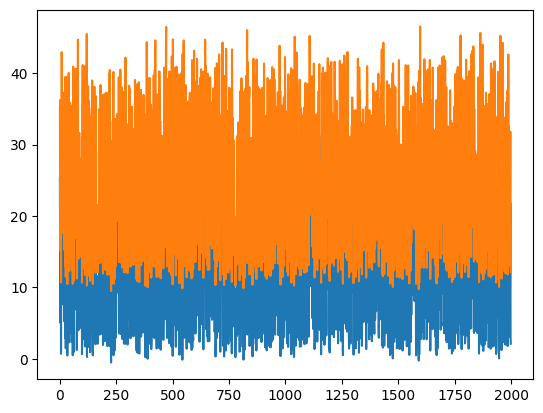

In [6]:
plt.plot(synthetic_C)
plt.plot(synthetic_P)
plt.show()

In [7]:
print('Exact value of call for r='+ str(r) + ', q=' + str(q) + ', C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = '  + str(np.std(synthetic_C, ddof=1)))
print(' ')
print('Exact value of put for r='+ str(r) + ', q=' + str(q) + ', P = ' + str(P))
print('mean_synthetic_P = ' + str(np.mean(synthetic_P)))
print('std_synthetic_P = '  + str(np.std(synthetic_P, ddof=1)))


Exact value of call for r=0.1, q=0.0, C = 26.48473458740481
mean_synthetic_C = 13.930262327836918
std_synthetic_C = 9.453501176056154
 
Exact value of put for r=0.1, q=0.0, P = 16.545117425982806
mean_synthetic_P = 23.930262327836918
std_synthetic_P = 9.453501176056154
